#### Author: Fardeen Ahmad Khan

### Simple Linear Regression using Python

In SLR we have two variables, x and y, x being the independent var and y being the dependent variable. We try to find a linear function that can predict the values of y based on x as a function of x. f(x) = y. this is basically done using the eq. of a line

Let us import the necessary packages and libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

dic1 = {"area": [2600,3000,3200,3600,4000],
"price" : [550000,565000,600000,650000,725000]}
data = pd.DataFrame(dic1)

As you can see I've hard coded the values for our data frame into a dictionary and used it 
to generate the dataframe, this is just for an example, we can use real world data as
well.

In [2]:
print(data)

   area   price
0  2600  550000
1  3000  565000
2  3200  600000
3  3600  650000
4  4000  725000


It is important to understand the code below,
our goal is to create a scatter plot with our values to understand
whether there is an underlying trend or not, so as to implement the
Linear Regression method.

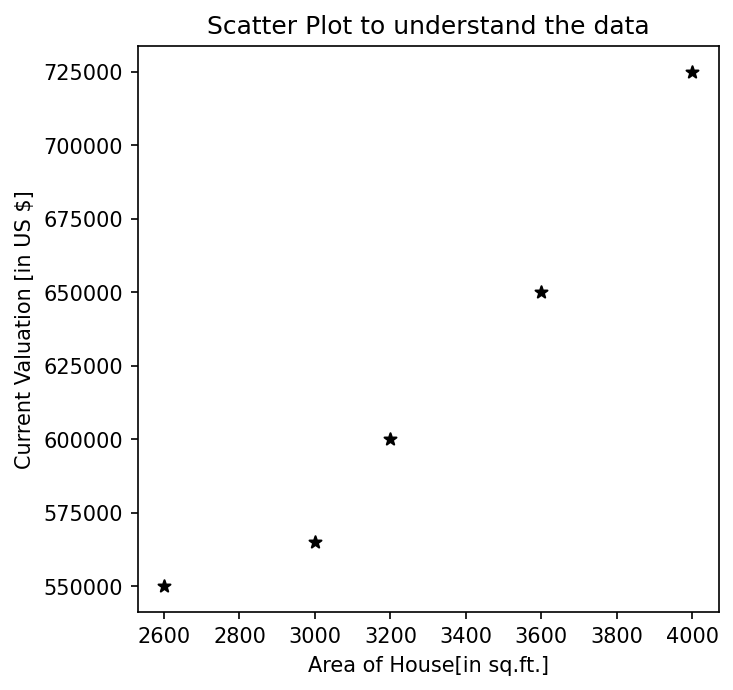

In [3]:
plt.figure(figsize=[5,5],dpi=150) #create a figure with size and dpi
plt.title("Scatter Plot to understand the data") #set a title for our figure
plt.xlabel("Area of House[in sq.ft.]") #set a x-axis label
plt.ylabel("Current Valuation [in US $]") #set a y-axis label
plt.scatter(data['area'],data['price'],color='black',marker='*') 
#use scatter function to plot the graph.

Now, the most important and perhaps the easiest lines of codes, using the LinearRegression() function from the linear_model module. We will first create an instance of this class and then
use this object to call the fit function. we must note that fit only takes a 2-D array as its
first argument, hence we need to write our data as data[['area']] whereas the data['price'] remains the same.

In [4]:
reg = linear_model.LinearRegression()
reg.fit(data[['area']],data['price']) #this trains our model with the data provided

LinearRegression()

Once our model has been trained, we will use this model to predict values.
using reg.predict() we can pass values for 2-D arrays for which we need 
predicted outputs.

c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


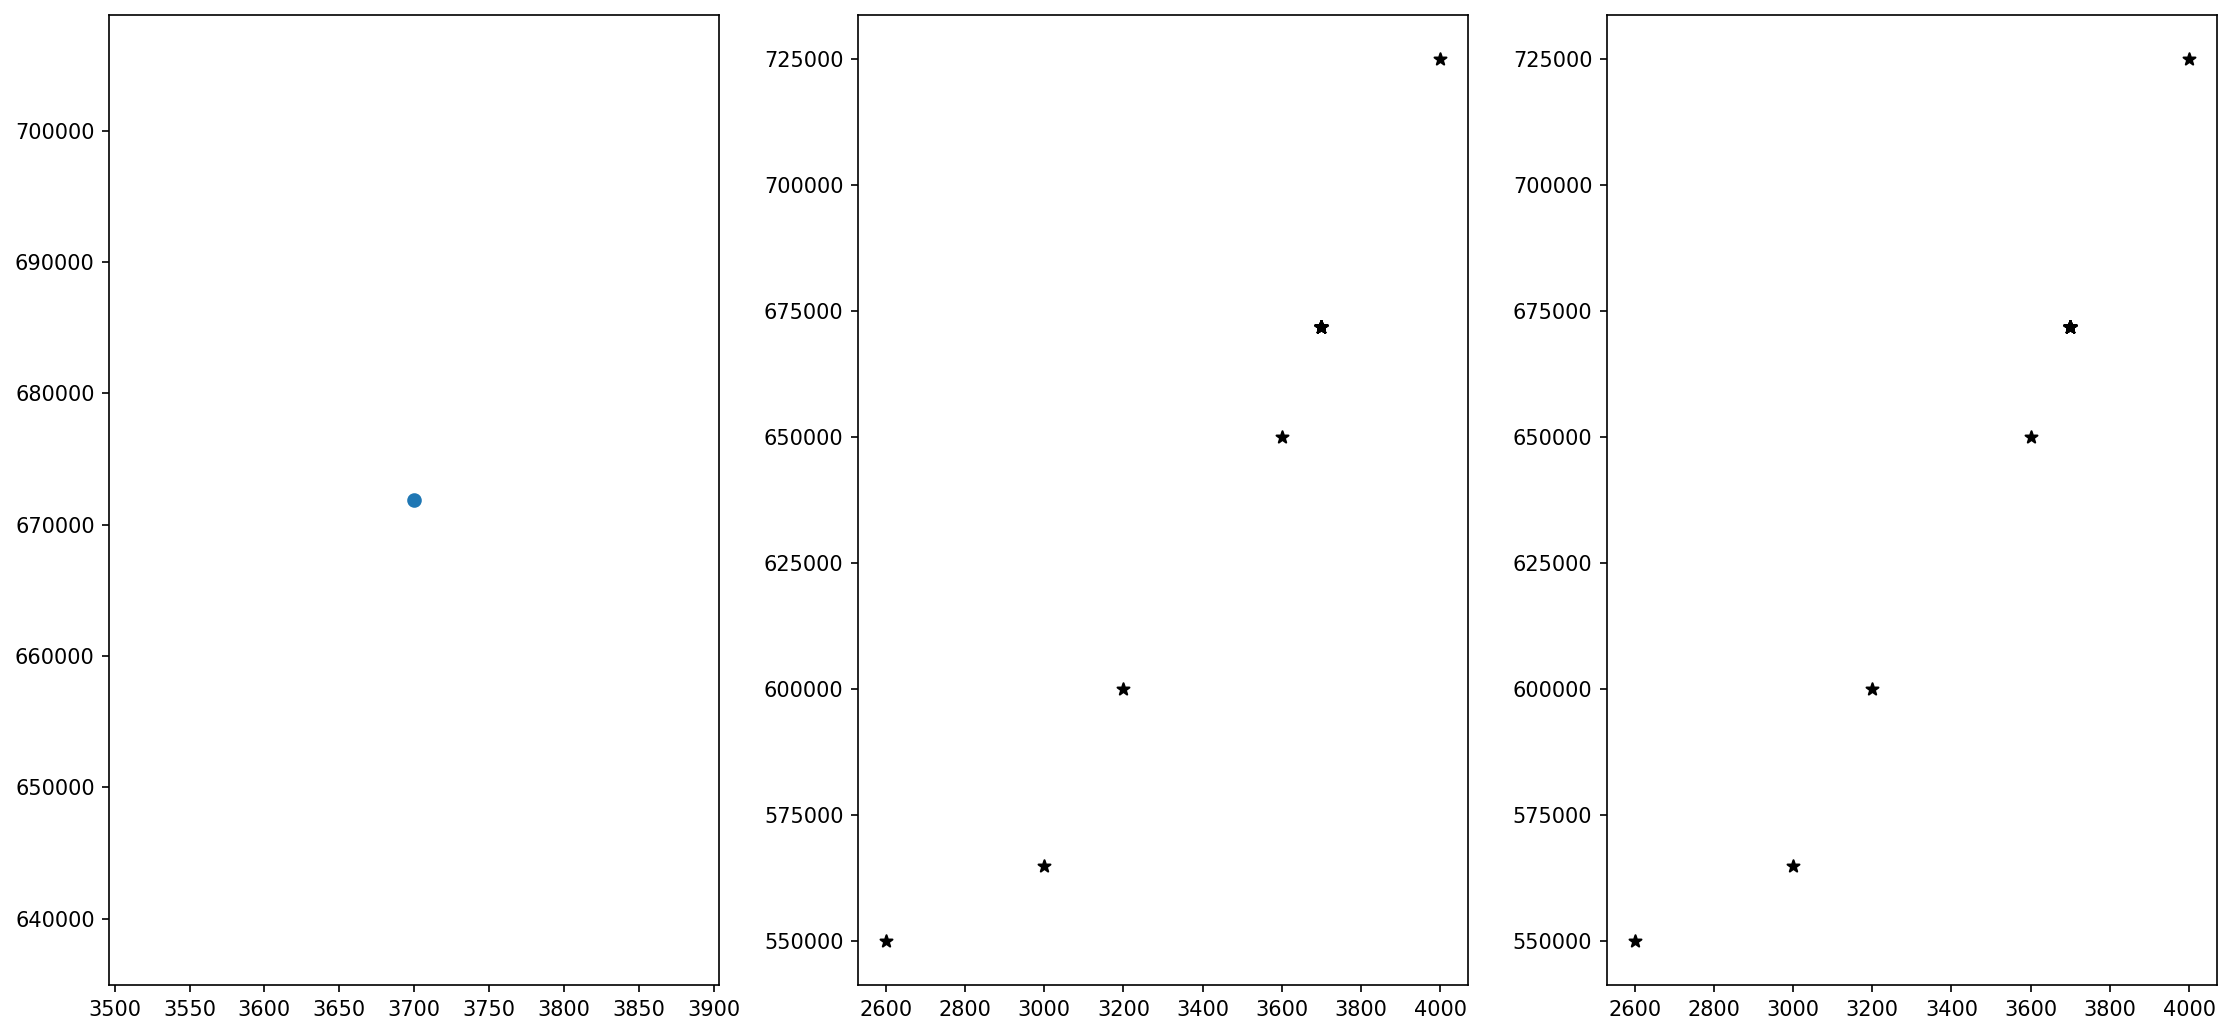

In [23]:
newy = int(reg.predict([[3700]])) #predicting output for value 3700 and storing in newy

plt.figure(figsize=[15,7],dpi=150) #plotting a big figure
plt.subplot(1,3,1) #subplot 1
plt.scatter(3700,newy) #with our predicted value
plt.subplot(1,3,2) #subplot 2
plt.scatter(data['area'],data['price'],color='black',marker='*')
nnewdata = data #creating another dataframe to add the newly predicted value
nnewdata.loc[len(nnewdata.index)] = [3700,newy] #appending the new value in  new df
plt.subplot(1,3,3) #subplot 3
plt.scatter(nnewdata['area'],nnewdata['price'],color='black',marker='*')
plt.tight_layout()

We can also use our model to get the values of coefficient (slope m) and the intercept c

In [6]:
print("Coefficient: {} and Intercept: {}".format(float(reg.coef_),reg.intercept_))

Coefficient: 128.25342465753428 and Intercept: 197328.76712328754


Finally, we will use the predictor function to plot a line which will be our predicted
best fit line, we can use this data to measure the accuracy of our data and further improve our
model.

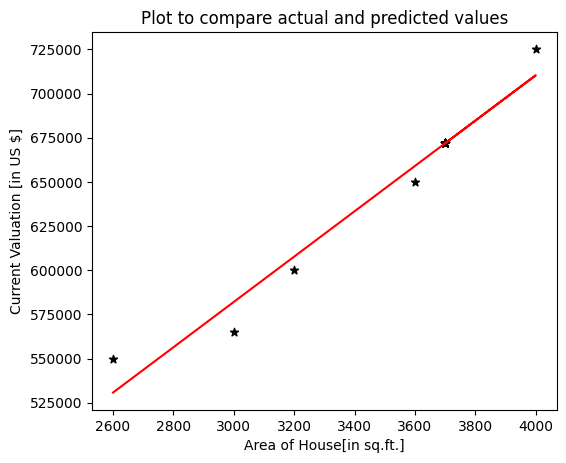

In [27]:
plt.figure(figsize=[6,5],dpi=100)
plt.title("Plot to compare actual and predicted values")
plt.xlabel("Area of House[in sq.ft.]")
plt.ylabel("Current Valuation [in US $]")
plt.scatter(data['area'],data['price'],color='black',marker='*')
plt.plot(data['area'],reg.predict(data[['area']]),color='red')